# Step 3. Parameterisation

## Quantum case

In [1]:
from lambeq import BobcatParser

sentence = 'John walks in the park'

# Get a string diagram
parser = BobcatParser(verbose='text')
diagram = parser.sentence2diagram(sentence)

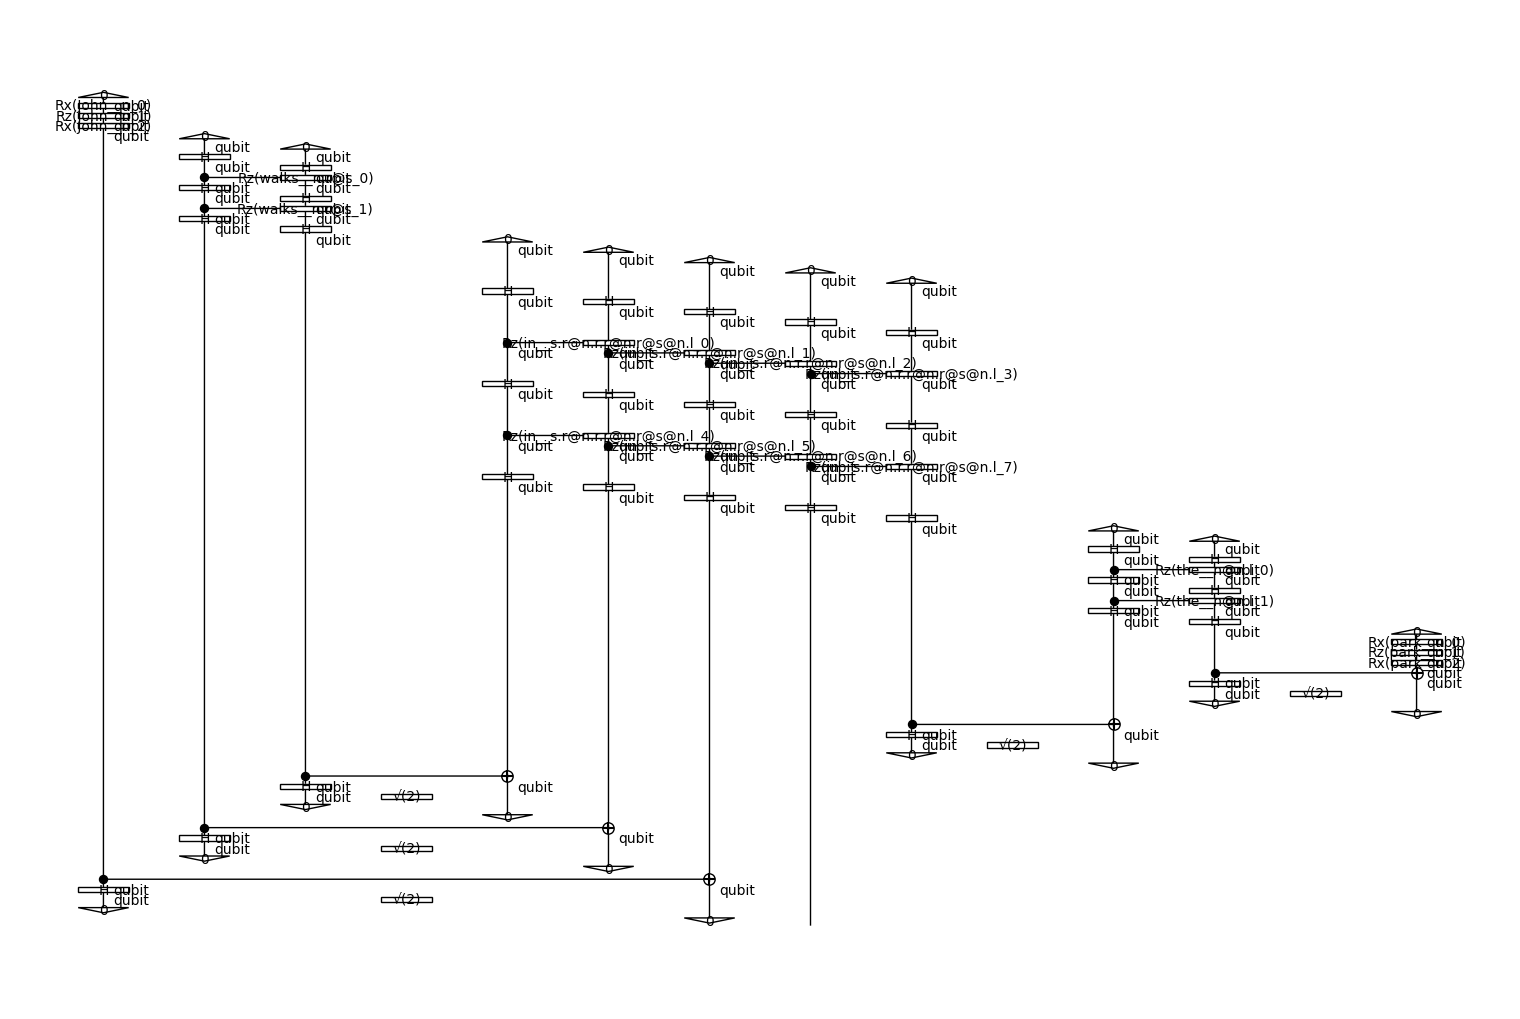

In [2]:
from lambeq import AtomicType, IQPAnsatz

# Define atomic types
N = AtomicType.NOUN
S = AtomicType.SENTENCE

# Convert string diagram to quantum circuit
ansatz = IQPAnsatz({N: 1, S: 1}, n_layers=2)
circuit = ansatz(diagram)
circuit.draw(figsize=(15,10))

In [3]:
from pytket.circuit.display import render_circuit_jupyter

tket_circuit = circuit.to_tk()

render_circuit_jupyter(tket_circuit)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [4]:
from pytket.extensions.qiskit import tk_to_qiskit

qiskit_circuit = tk_to_qiskit(tket_circuit)

## Classical case

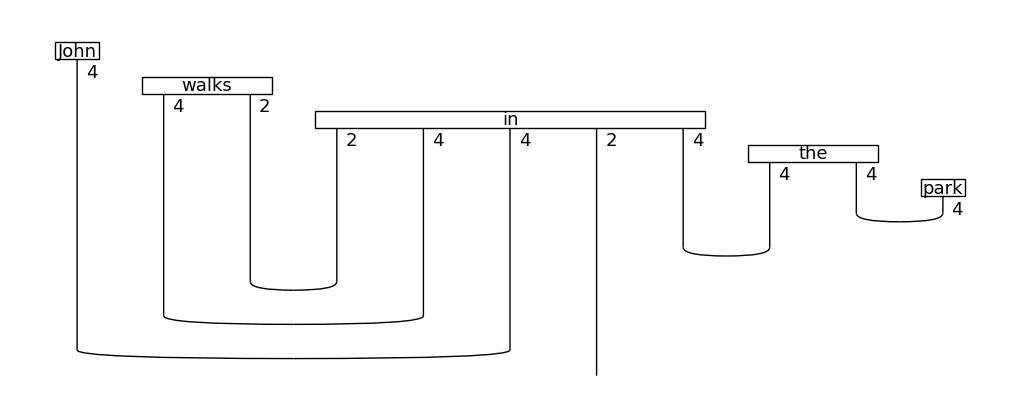

In [5]:
from lambeq import TensorAnsatz
from lambeq.backend.tensor import Dim

tensor_ansatz = TensorAnsatz({N: Dim(4), S: Dim(2)})
tensor_diagram = tensor_ansatz(diagram)

tensor_diagram.draw(figsize=(10,4), fontsize=13)

### Matrix product states

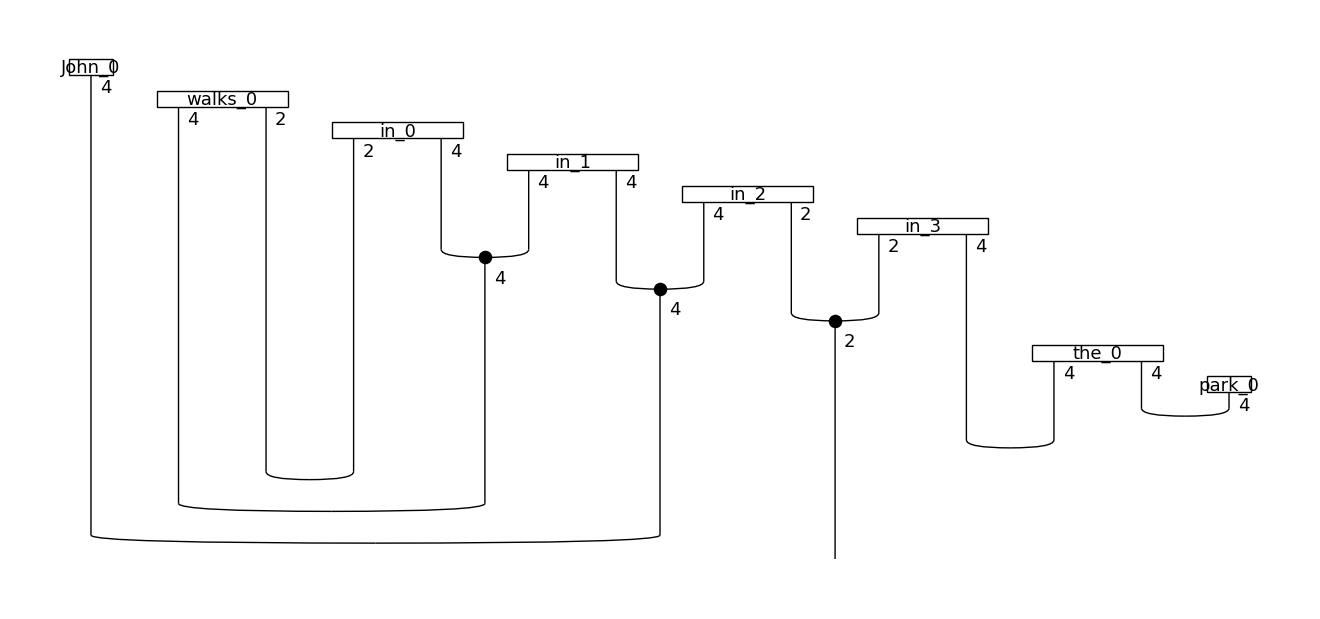

In [6]:
from lambeq import SpiderAnsatz
from lambeq.backend.tensor import Dim

spider_ansatz = SpiderAnsatz({N: Dim(4), S: Dim(2)})
spider_diagram = spider_ansatz(diagram)
spider_diagram.draw(figsize=(13,6), fontsize=13)

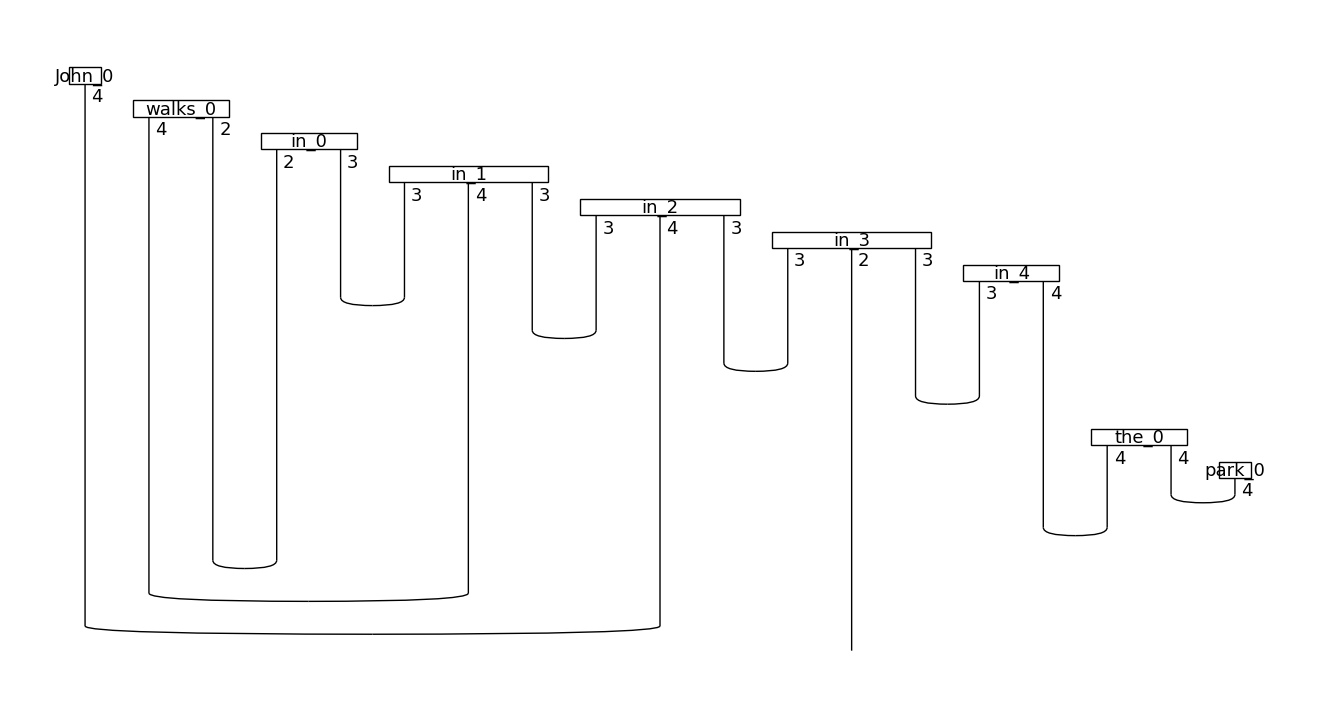

In [7]:
from lambeq import MPSAnsatz
from lambeq.backend.tensor import Dim

mps_ansatz = MPSAnsatz({N: Dim(4), S: Dim(2)}, bond_dim=3)
mps_diagram = mps_ansatz(diagram)
mps_diagram.draw(figsize=(13,7), fontsize=13)